# Partisipasi HNSW Graph Construct
IR Gasal 2023/2024
- Syahrul Apriansyah
- 2106708311

In [ ]:
!pip install hnswlib

  Using cached hnswlib-0.8.0.tar.gz (36 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp310-cp310-linux_x86_64.whl size=2287616 sha256=20b0c06452cc1e39f0f4bee04a793edd631213017ec25bdfac9659e7c2d801ed
  Stored in directory: /root/.cache/pip/wheels/af/a9/3e/3e5d59ee41664eb31a4e6de67d1846f86d16d93c45f277c4e7
Successfully built hnswlib


In [ ]:
import hnswlib
import numpy as np

# Parameter
dim = 100  # Dimensi vektor
num_elements = 100  # Jumlah elemen untuk disisipkan
M = 16  # Jumlah maksimum connection per elemen
ef_construction = 200  # ef_construction parameter yang digunakan selama fase konstruksi
L = 10  # Jumlah maksimum lapisan

# Inisialisasi index HNSW
p = hnswlib.Index(space='l2', dim=dim)

# Inisialisasi index dengan jumlah maksimum item yang diharapkan
p.init_index(max_elements=num_elements, ef_construction=ef_construction, M=M)

p.set_ef(L)  # ef parameter yang digunakan selama pencarian

# Membangun graf HNSW dengan menyisipkan vektor acak
np.random.seed(42)
data = np.random.randn(num_elements, dim).astype(np.float32)

p.add_items(data)

# p.save_index("hnsw_index.bin")
# p.load_index("hnsw_index.bin")

p.set_ef(50)  # ef parameter yang digunakan selama pencarian

# Contoh pencarian k tetangga terdekat
k = 1
query_data = np.random.randn(1, dim).astype(np.float32)
labels, distances = p.knn_query(query_data, k=k)

# labels adalah ID dari tetangga terdekat dan distances adalah jarak mereka dari query
print(labels, distances)


[[26]] [[144.35768]]


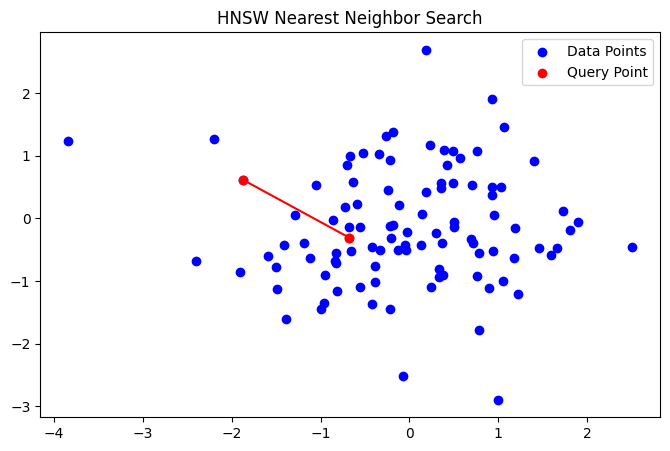

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
for label, distance in zip(labels[0], distances[0]):
    plt.plot([query_data[0][0], data[label][0]], [query_data[0][1], data[label][1]], 'ro-')
plt.scatter(data[:, 0], data[:, 1], c='b', label='Data Points')
plt.scatter(query_data[0][0], query_data[0][1], c='r', label='Query Point')
plt.title('HNSW Nearest Neighbor Search')
plt.legend()
plt.show()